# **Classic ML models**

In [ ]:
!pip install argparse -q #Argparse 3.2
!pip install xtract -q #Xtract 0.1 a3

In [1]:
## install and download 
from IPython.display import clear_output
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import re
import numpy as np
import string
import time

# wizualizacja
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sklearn - modele do ML
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

## Load the labeled data 
Preprocessing output csv file 

In [2]:
#Authenticate
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/tweets_labeled_bi.csv'   
tweets_txt = pd.read_csv(path, delimiter = ",", encoding='utf-8')
tweets_txt.head()

,Unnamed: 0,text,clean_text,cleaned_text,sentiment,sentiments_val
0,0,"kiedy #coronavirus dotrze do polski, napotka o...","['coronavirus', 'dotrze', 'polski', 'napotka',...",coronavirus dotrze polski napotka opór znakomi...,0,negative
1,1,kolejni polacy chcą wrócić z wuhan https://t.c...,"['kolejni', 'polacy', 'chcą', 'wrócić', 'wuhan']",kolejni polacy chcą wrócić wuhan,0,negative
2,2,a tymczasem w wuhan odcięto od reszty świata o...,"['tymczasem', 'wuhan', 'odcięto', 'reszty', 'ś...",tymczasem wuhan odcięto reszty świata obszar p...,1,positive
3,3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"['zdziwię', 'powiedzą', 'listy', 'pojechały', ...",zdziwię powiedzą listy pojechały chin wuhan od...,0,negative
4,4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...","['rp', 'polaków', 'wrócić', 'wuhan', 'ambasadz...",rp polaków wrócić wuhan ambasadzie rp pekinie ...,0,negative


## Split the dataset into train, test and validation subsets

In [4]:
X = tweets_txt['cleaned_text'].values.astype('U')
Y = tweets_txt['sentiment'].values.astype('U')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =37)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state =37)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=485087)
vectors = vectorizer.fit_transform(X_train, X_test)


In [6]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [7]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_validation = y_validation.astype(int)

## Define model evaluation method

In [8]:
def model_Evaluate(model):
  # Predykcja danych na danych testowych
  y_pred = model.predict(X_test)

  # Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
  print(classification_report(y_test, y_pred))

  # Obliczamy i wyświetlamy confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Algorithm 1 - Bernoulli Naive Bayes

In [9]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28612
           1       0.91      0.78      0.84     19897

    accuracy                           0.88     48509
   macro avg       0.89      0.86      0.87     48509
weighted avg       0.88      0.88      0.88     48509



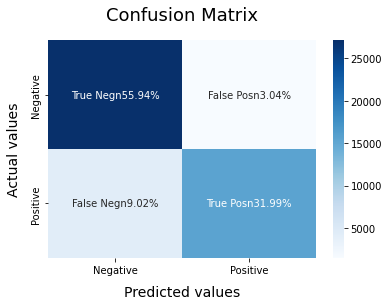

In [10]:
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

##### ROC Curve

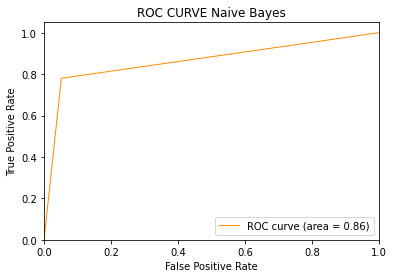

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## Algorithm 2 - Linear Support Vector Classification.

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     28612
           1       0.91      0.92      0.91     19897

    accuracy                           0.93     48509
   macro avg       0.93      0.93      0.93     48509
weighted avg       0.93      0.93      0.93     48509



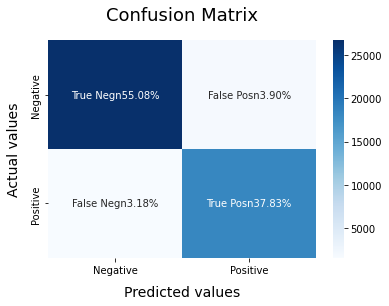

In [12]:
clf = LinearSVC(random_state=0)
y_pred2 = clf.fit(X_train, y_train).decision_function(X_test)
model_Evaluate(clf)

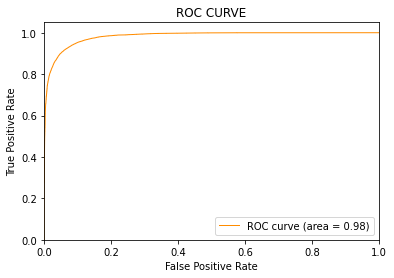

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Algorithm 3 - Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     28612
           1       0.91      0.89      0.90     19897

    accuracy                           0.92     48509
   macro avg       0.92      0.91      0.91     48509
weighted avg       0.92      0.92      0.92     48509



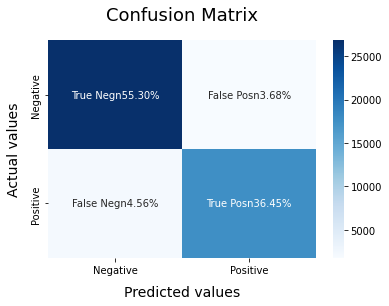

In [14]:
# define and fit the model
LRmodel = LogisticRegression(max_iter = 1000)
y_pred3 = LRmodel.fit(X_train, y_train).decision_function(X_test)
model_Evaluate(LRmodel)

##### ROC Curve

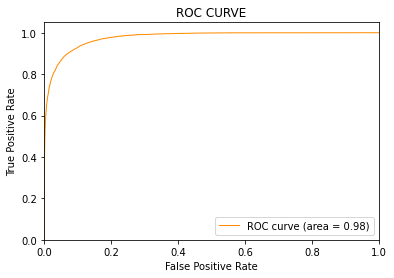

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()